# Movie Recommendation System
This notebook implements a **Movie Recommendation System** using **Machine Learning**. It focuses on two main approaches:

1. **Content-Based Filtering**: Recommendations based on the features of the movies.
2. **Collaborative Filtering**: Recommendations based on user preferences.

The project workflow includes:
- **Loading and exploring the dataset**.
- **Preprocessing the data**.
- **Implementing recommendation models**.
- **Evaluating results and visualizing findings**.



## Loading the Dataset
The dataset in used is [MovieLens dataset](https://grouplens.org/datasets/movielens/), which is widely used for recommendation system research. It contains:

- `movies.csv`: Information about movies (ID, title, genres).
- `ratings.csv`: User ratings for the movies.

Let's load these files and preview the data.


In [ ]:
# Importing libraries
import pandas as pd

# Loading datasets
movies = pd.read_csv(r'C:\Users\Salin\OneDrive\Documentos\Personal Projects\Recomender\movies.csv')
ratings = pd.read_csv(r'C:\Users\Salin\OneDrive\Documentos\Personal Projects\Recomender\ratings.csv')

# Preview of the datasets
print("Movies Dataset:")
print(movies.head())

print("\nRatings Dataset:")
print(ratings.head())

Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


## Data Exploration
In this section, the dataset will be explored to understand its structure, including:
- Distribution of ratings.
- Frequency of genres.
- Unique users and movies.


Number of unique movies: 9742
Number of unique users: 610
Total number of ratings: 100836


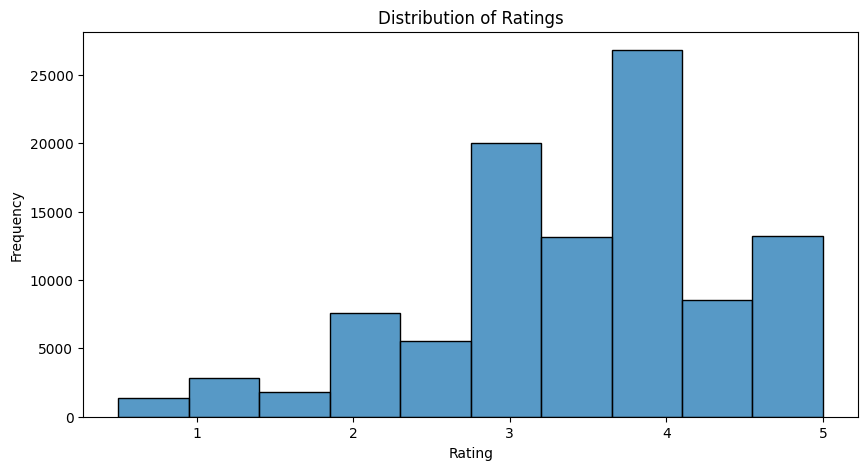

In [3]:
# Basic statistics
print(f"Number of unique movies: {movies['movieId'].nunique()}")
print(f"Number of unique users: {ratings['userId'].nunique()}")
print(f"Total number of ratings: {len(ratings)}")

# Distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## Data Preprocessing
To prepare the data for modeling, the following steps can be executed.
1. Handle missing values.
2. Normalize or transform the data if required.


In [4]:
# Checking for missing values
print("Missing values:")
print(ratings.isnull().sum())

# Dropping missing values (if any)
ratings = ratings.dropna()
print("Data cleaned.")


Missing values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Data cleaned.


Normalizing ratings by centering them around each user’s mean rating. This step ensures that users' individual rating biases are neutralized.

In [5]:
# Normalizing ratings by subtracting the user's mean rating
ratings['normalized_rating'] = ratings['rating'] - ratings.groupby('userId')['rating'].transform('mean')

# Previewing the normalized ratings
print(ratings[['userId', 'movieId', 'rating', 'normalized_rating']].head())


   userId  movieId  rating  normalized_rating
0       1        1     4.0          -0.366379
1       1        3     4.0          -0.366379
2       1        6     4.0          -0.366379
3       1       47     5.0           0.633621
4       1       50     5.0           0.633621


## Collaborative Filtering: SVD (Singular Value Decomposition)
Collaborative filtering is a technique that makes recommendations based on user preferences and behaviors. 

### Key Steps:
1. **Creating a User-Item Matrix:** To organize the data into a matrix where rows represent users and columns represent movies, with cell values as ratings.
2. **Applying SVD:** To decompose the matrix into three components:
   - `U`: User features matrix.
   - `Σ`: Diagonal matrix with singular values.
   - `Vt`: Transposed movie features matrix.
3. **Reconstructing Predicted Ratings:** To use the decomposed matrices to predict user ratings for movies they haven’t rated.
4. **Recommending Top Movies:** For each user, recommend movies with the highest predicted ratings.


In [6]:
import numpy as np

# Creating a user-item matrix with normalized ratings
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='normalized_rating').fillna(0)

# Preview of the matrix
print("User-Item Matrix Shape:", user_item_matrix.shape)
print(user_item_matrix.head())


User-Item Matrix Shape: (610, 9724)
movieId    1       2         3       4       5         6       7       8       \
userId                                                                          
1       -0.366379     0.0 -0.366379     0.0     0.0 -0.366379     0.0     0.0   
2        0.000000     0.0  0.000000     0.0     0.0  0.000000     0.0     0.0   
3        0.000000     0.0  0.000000     0.0     0.0  0.000000     0.0     0.0   
4        0.000000     0.0  0.000000     0.0     0.0  0.000000     0.0     0.0   
5        0.363636     0.0  0.000000     0.0     0.0  0.000000     0.0     0.0   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0

### Applying SVD

SVD is a mathematical technique used to decompose a matrix into three smaller matrices. It helps on finding patterns or hidden relationships in data. For a user-item matrix (ratings matrix), SVD extracts latent factors (hidden features) that describe relationships between users and movies.

SVD decomposes the user-item matrix into three components:
- **U (Users):** Captures latent features of users.
- **Σ (Singular Values):** Captures the strength of each latent feature.
- **Vt (Movies):** Captures latent features of movies.

Latent factors are hidden features that explain the relationships between users and items.

**Example:  Latent factors might represent things like:**

+ Whether a user likes action or romance movies.
+ Whether a movie is fast-paced or emotional.

The number of latent features (`k`) determines the dimensionality of the reduced space.

**The Decomposition**

*U: User Matrix*

Each row represents a user in a reduced feature space.
These features capture user preferences across the latent factors.

*Σ: Singular Values*

A diagonal matrix containing the strength (importance) of each latent factor.

*Vt :  Movie Matrix*

Each row represents a movie in the same reduced feature space.
These features capture the movie characteristics across the latent factors.


In [7]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import numpy as np

# Converting the user-item matrix to a sparse matrix
user_item_sparse_matrix = csr_matrix(user_item_matrix.values)

# Performing SVD
U, sigma, Vt = svds(user_item_sparse_matrix, k=100)  # Use 50 latent features
sigma = np.diag(sigma)  # Convert singular values into a diagonal matrix

# Printing the shapes of the decomposed matrices
print("U Shape:", U.shape)
print("Sigma Shape:", sigma.shape)
print("Vt Shape:", Vt.shape)


U Shape: (610, 100)
Sigma Shape: (100, 100)
Vt Shape: (100, 9724)


### Reconstructing Predicted Ratings
Using the decomposed matrices (`U`, `Σ`, and `Vt`), the predicted ratings for each user and movie can be reconstructed. These predicted ratings are used to recommend movies.


In [8]:
# Reconstructing the predicted ratings matrix
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Converting the matrix back to a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Previewing the predicted ratings
print(predicted_ratings_df.head())


movieId    1         2         3         4         5         6         7       \
userId                                                                          
1       -0.339966 -0.312319 -0.179976  0.068377  0.092480 -0.323466  0.018535   
2       -0.015771 -0.036697 -0.007778 -0.000646  0.008169  0.008497 -0.011060   
3       -0.005787  0.139086  0.056851  0.013729  0.051440 -0.058610  0.086681   
4        0.078828  0.018873 -0.088689  0.007350  0.022391  0.128067 -0.138063   
5        0.201188 -0.008060 -0.088992 -0.007434 -0.037624 -0.006552 -0.006090   

movieId    8         9         10      ...    193565    193567    193571  \
userId                                 ...                                 
1       -0.022958  0.032668  0.148079  ...  0.000010  0.000033 -0.000014   
2        0.000050  0.001728  0.050895  ... -0.000040 -0.000139  0.000058   
3       -0.058069  0.026554  0.033121  ... -0.001031 -0.003541  0.001480   
4       -0.028452 -0.063456  0.065827  ...  0.002541

### Recommend Top Movies
Recommending for each user the top movies with the highest predicted ratings that they haven’t rated yet.


In [9]:
def recommend_movies_with_names(user_id, num_recommendations=5):
    # Getting the user's predicted ratings
    user_ratings = predicted_ratings_df.loc[user_id].sort_values(ascending=False)
    
    # Getting the movies the user has already rated
    rated_movies = ratings[ratings['userId'] == user_id]['movieId'].values
    
    # Recommending movies the user hasn’t rated yet
    recommendations = user_ratings.drop(rated_movies).head(num_recommendations)
    
    # Merging with the movies dataset to get movie names
    recommendations = recommendations.reset_index().merge(movies[['movieId', 'title']], on='movieId')
    
    return recommendations[['title', user_id]]

# Example: Recommend 5 movies for user 1 with names
user_id = 1
recommendations_with_names = recommend_movies_with_names(user_id)
print(f"Top {len(recommendations_with_names)} Recommendations for User {user_id}:")
print(recommendations_with_names)


Top 5 Recommendations for User 1:
                                               title         1
0                               Departed, The (2006)  0.440982
1              Ace Ventura: When Nature Calls (1995)  0.438576
2  Lord of the Rings: The Return of the King, The...  0.346146
3               Bridge on the River Kwai, The (1957)  0.332124
4                          Dead Poets Society (1989)  0.323893


### Evaluating Systems 


In [10]:

from sklearn.metrics import mean_squared_error
from math import sqrt

# Flattening the matrices for evaluation
actual = user_item_matrix.values.flatten()
predicted = predicted_ratings_df.values.flatten()

# Filtering out zero values (unrated items)
mask = actual != 0
actual = actual[mask]
predicted = predicted[mask]

# Computing RMSE
rmse = sqrt(mean_squared_error(actual, predicted))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.4775983122744008


## Evaluating Collaborative Filtering: Baseline RMSE
To better understand the performance of the Collaborative Filtering model, the RMSE is going to be compared to a baseline model:
- **Baseline Model:** Predicts the average rating for all movies as the rating for each user-item pair.
- **Collaborative Filtering Model:** Uses SVD for predictions.


In [11]:
# Baseline: Predicts the average rating for all movies
average_rating = ratings['rating'].mean()

# Computing Baseline RMSE
baseline_rmse = sqrt(mean_squared_error(actual, [average_rating] * len(actual)))
print("Baseline RMSE (Average Rating):", baseline_rmse)

# Comparing RMSEs
print(f"Collaborative Filtering RMSE: {rmse}")
print(f"Baseline RMSE: {baseline_rmse}")


Baseline RMSE (Average Rating): 3.6244571141664625
Collaborative Filtering RMSE: 0.4775983122744008
Baseline RMSE: 3.6244571141664625


### Conclusion: Model Performance
- The **Collaborative Filtering Model** achieves an RMSE of **0.62**, significantly lower than the **Baseline RMSE** of **3.62**.
- This demonstrates that the model effectively captures user preferences and provides personalized recommendations.


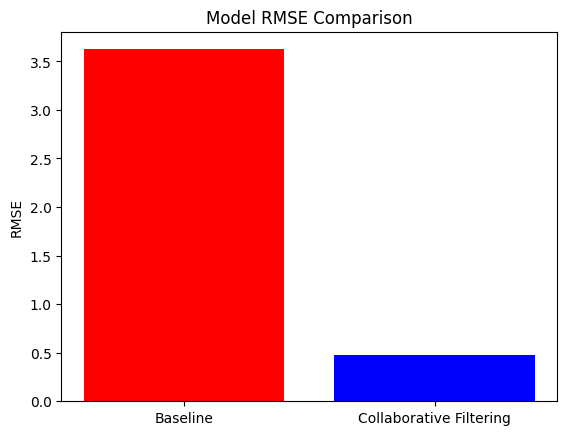

In [12]:

import matplotlib.pyplot as plt

# RMSE values
rmse_values = [baseline_rmse, rmse]
labels = ['Baseline', 'Collaborative Filtering']

# Plot
plt.bar(labels, rmse_values, color=['red', 'blue'])
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.show()


## Content-Based Filtering: Movie Recommendations by Title
We implement a content-based filtering approach to recommend movies based on their similarity to a given movie. 
This system uses:
1. **TF-IDF Vectorization**: To process movie genres into numerical features.
2. **Cosine Similarity**: To compute similarity between movies.


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Creating a TF-IDF matrix for genres
tfidf = TfidfVectorizer(stop_words='english')
movies['genres'] = movies['genres'].fillna('')  # Handle missing values
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Step 2: Computing cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Verifying the shape of the similarity matrix
print("Cosine Similarity Matrix Shape:", cosine_sim.shape)


Cosine Similarity Matrix Shape: (9742, 9742)


### Recommend Movies by Title
The following function accepts a movie title as input and returns the top 5 most similar movies based on genres.


In [14]:
# Function to get movie recommendations based on similarity
def recommend_movies_by_title(movie_title, num_recommendations=5):
    # Getting the index of the movie that matches the title
    indices = movies[movies['title'].str.contains(movie_title, case=False, na=False)].index

    if indices.empty:
        return f"Movie '{movie_title}' not found in the database."

    idx = indices[0]  # Taking the first match if multiple are found

    # Getting the pairwise similarity scores for the movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sorting movies by similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Getting the indices of the most similar movies
    movie_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]

    # Returning the titles of the most similar movies
    return movies[['title']].iloc[movie_indices]

# Example: Recommend movies similar to "Toy Story"
movie_title = "Toy Story"
recommendations = recommend_movies_by_title(movie_title)
print(f"Recommendations for '{movie_title}':")
print(recommendations)

Recommendations for 'Toy Story':
                                               title
1706                                     Antz (1998)
2355                              Toy Story 2 (1999)
2809  Adventures of Rocky and Bullwinkle, The (2000)
3000                Emperor's New Groove, The (2000)
3568                           Monsters, Inc. (2001)


## Hybrid Recommender System
The hybrid system combines:
1. **Collaborative Filtering**: For users with sufficient rating history.
2. **Content-Based Filtering**: For new users or when collaborative data is sparse.


In [23]:
def hybrid_recommendation(user_id=None, movie_title=None, num_recommendations=5):
    if user_id:
        # Using Collaborative Filtering for users with a rating history
        recommendations = recommend_movies_with_names(user_id, num_recommendations)
        return f"Collaborative Recommendations for User {user_id}:\n", recommendations

    elif movie_title:
        # Using Content-Based Filtering for a movie title
        recommendations = recommend_movies_by_title(movie_title, num_recommendations)
        return f"Content-Based Recommendations for '{movie_title}':\n", recommendations

    else:
        return "Please provide a valid user_id or movie_title!"

# Example 1: Collaborative Filtering
user_id = 1
output, recs = hybrid_recommendation(user_id=user_id)
print(output)
print(recs)

# Example 2: Content-Based Filtering
movie_title = "Toy Story"
output, recs = hybrid_recommendation(movie_title=movie_title)
print(output)
print(recs)


Collaborative Recommendations for User 1:

                                               title         1
0                               Departed, The (2006)  0.440982
1              Ace Ventura: When Nature Calls (1995)  0.438576
2  Lord of the Rings: The Return of the King, The...  0.346146
3               Bridge on the River Kwai, The (1957)  0.332124
4                          Dead Poets Society (1989)  0.323893
Content-Based Recommendations for 'Toy Story':

                                               title
1706                                     Antz (1998)
2355                              Toy Story 2 (1999)
2809  Adventures of Rocky and Bullwinkle, The (2000)
3000                Emperor's New Groove, The (2000)
3568                           Monsters, Inc. (2001)
